In [33]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

# Javeriana Cali


## Segundo parcial de Modelación y Simulación II

Por favor marque el archivo con us nombre de la siguiente manera: parcial2_nombre.ipynb


# Problema  1
Encontrar la formula variacional e implementar en fenics la siguiente ecuación de Poisson:

$$-\nabla\cdot(\frac{1}{8}+u)^2\nabla u=1$$
donde $\Omega=[0,1]\times[0,1]$ y $u=0$ en $\partial\Omega$.

Formula variacional:
$$ \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx = \int_{\Omega} v \, dx $$

Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in err

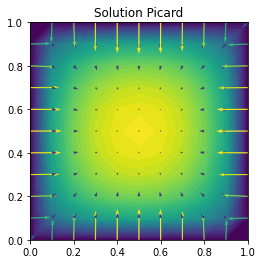

In [34]:
# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define boundary condition
g = Constant(0.0)
bc = DirichletBC(V, g, 'on_boundary')

# Define parameters
def alpha_(u):
    return ((1/8) + u) * ((1/8) + u)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(g,V)
a = alpha_(u_k)*inner(nabla_grad(u), nabla_grad(v))*dx
L = v*dx

# Picard iteration
u = Function(V)
eps = 1
tol = 1.0E-5
iter = 0
maxiter = 25
while eps > tol and iter < maxiter:
    iter += 1
    solve(a == L, u, bc)
    eps = errornorm(u_k, u, norm_type='L2', degree_rise=3)
    u_k.assign(u)

plot(u)
plot(nabla_grad(u), title="Solution Picard")

# Problema 2
Encontrar la formula variacional e implementar en fenics la siguiente ecuación
$$-\nabla^2 u=f,$$
donde $f(x,y)=\frac{e^{-(x-0.5)^2-(y-0.5)^2}}{0.02}$ y las condiciones de borde son
$u(x,y)=0$ para $x=0$ o $x=1$ y $\frac{\partial u}{\partial n}(x,y)=sin(5x)$ para $y=0$ o $y=1$, para $\Omega=[0,1]\times[0,1]$

Formula variacional:
$$ \int_{\Omega} \nabla u \cdot \nabla v \, dx = \int_{\Omega} f v \, dx + \int_{\Gamma_N} \sin{(5x)}v \, dS $$

Solving linear variational problem.


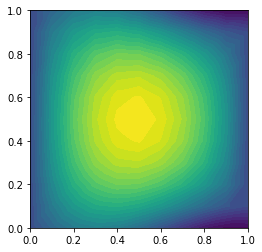

In [35]:
# Create mesh
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)

# Define function space
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define functions for boundary conditions
u_D = Constant(0.0)
u_N = Expression('sin(5*x[0])', degree=2)

# Define boundary conditions
def boundary_D(x, on_boundary):
    return on_boundary and (near(x[0], 0) or near(x[0], 1))

def boundary_N(x, on_boundary):
    return on_boundary and (near(x[1], 0) or near(x[1], 1))

bc_D = DirichletBC(V, u_D, boundary_D)
bc_N = DirichletBC(V, u_N, boundary_N)
bcs = [bc_D, bc_N]

# Define vartional problem
f = Expression('exp(-pow(x[0]-0.5, 2)-pow(x[1]-0.5, 2))/0.02', degree=2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx + u_N*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
plot(u)

# Problema 3

Sea le siguiente problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\nabla\cdot\Big((x^2+1)\nabla u(x,y)\Big)+g(x,y),\quad &\text{ en } \Omega\times(0,T]\\
u(x,y,0)=x^2+y^2+sin(x*y),\\
u|_{\partial \Omega}=x^2+y^2+sin(x*y+t)\end{cases}$$

$$g(x,y)=−2x(2x+ycos(t+xy))−(x^2+1)(−x^2sin(t+xy)+2)−(x^2+1)(−y^2sin(t+xy)+2)+cos(t+xy)$$

a. Encontrar la formula variacional del problema.


b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

Formula variacional:
$$ \int_{\Omega} u^k v \, dx + dt \int_{\Omega} \alpha(x,y) \nabla u^k \cdot \nabla v \, dx = \int_{\Omega} (dt \cdot g + u^{k-1})v \, dx $$

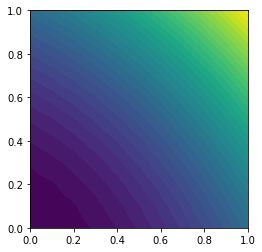

In [36]:
#Discretization
T = 1 # final time
num_steps = 100 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
u_D = Expression('x[0]*x[0] + x[1]*x[1] + sin(x[0]*x[1] + t)',degree=2, t=0)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define the initial condition, u(t=0, x) = sin(x)
initial_condition = Expression('x[0]*x[0] + x[1]*x[1] + sin(x[0]*x[1])', degree=2)
u_k_old = interpolate(initial_condition, V)
plot(u_k_old)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

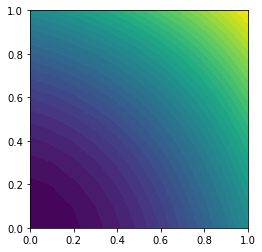

In [37]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
alpha_ = Expression("x[0]*x[0] + 1", degree=2)
T_ = 0
g = Expression('-2*x[0]*(2*x[0] + x[1]*cos(t + x[0]*x[1])) - (x[0]*x[0] + 1)*(- x[0]*x[0] * sin(t + x[0]*x[1]) + 2) - (x[0]*x[0] + 1)*(- x[1]*x[1] * sin(t + x[0]*x[1]) + 2) + cos(t + x[0]*x[1])',degree=2, t=T_)

a = u*v*dx + dt*alpha_*inner(nabla_grad(u), nabla_grad(v))*dx
L = (dt*g + u_k_old)*v*dx

# Time-stepping
u = Function(V)
t = 0
fid = File("parcial2_uribe/solution3.pvd")
while t <= T:
    # Update time
    t += dt
    u_D.t = t
    g.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Update previous solution
    u_k_old.assign(u)
    fid << u, t